In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
u = 1.1       # Up factor
d = 0.9       # Down factor
r = 0.05      # Risk-free rate
T = 1         # Time to maturity (1 year)

# Risk-neutral probability
p = (np.exp(r * T) - d) / (u - d)

# Payoffs at maturity
Su = S0 * u
Sd = S0 * d
Cu = max(Su - K, 0)
Cd = max(Sd - K, 0)

# Present value of expected payoff
C0 = np.exp(-r * T) * (p * Cu + (1 - p) * Cd)

print(f"1-Step Binomial Call Option Price: {C0:.2f}")


1-Step Binomial Call Option Price: 7.19


no arbitrage, frictionless markets, discrete steps, constant volatility.

In [9]:
def binomial_call_option(S0, K, T, r, u, d, N):
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Stock prices at maturity
    ST = np.array([S0 * (u**j) * (d**(N - j)) for j in range(N + 1)])
    
    # Option values at maturity
    C = np.maximum(ST - K, 0)
    
    # Backward induction
    for i in range(N - 1, -1, -1):
        C = np.exp(-r * dt) * (p * C[1:i+2] + (1 - p) * C[0:i+1])
    
    return C[0]

# Example with 5 steps
binom_price = binomial_call_option(S0=100, K=100, T=1, r=0.05, u=1.1, d=0.9, N=5)
print(f"5-Step Binomial Call Price: {binom_price:.2f}")


5-Step Binomial Call Price: 11.66


Binomial converges to Black-Scholes as N → ∞

In [11]:
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

# Example Black-Scholes price
bs_price = black_scholes_call(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Black-Scholes Call Price: {bs_price:.2f}")


Black-Scholes Call Price: 10.45


assumptions of Black-Scholes: continuous trading, lognormal distribution, constant volatility, no dividends, no transaction costs.

In [14]:
prices = []

for N in [1, 5, 25, 100, 500]:
    price = binomial_call_option(S0=100, K=100, T=1, r=0.05, u=1.1, d=0.9, N=N)
    prices.append((N, price))

bs = black_scholes_call(100, 100, 1, 0.05, sigma=0.2)

comparison_df = pd.DataFrame(prices, columns=["Steps", "Binomial Price"])
comparison_df["Black-Scholes Price"] = bs
comparison_df


,Steps,Binomial Price,Black-Scholes Price
0,1,7.194676,10.450584
1,5,11.663077,10.450584
2,25,21.792817,10.450584
3,100,39.984892,10.450584
4,500,74.408354,10.450584


now watch! binomial prices converge to BS price as steps increase.

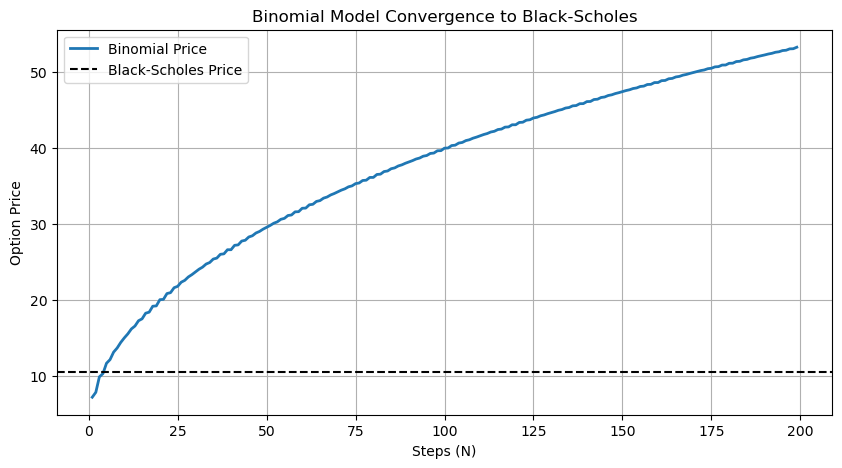

In [17]:
Ns = np.arange(1, 200)
bin_prices = [binomial_call_option(100, 100, 1, 0.05, 1.1, 0.9, N) for N in Ns]
bs_price = black_scholes_call(100, 100, 1, 0.05, 0.2)

plt.figure(figsize=(10, 5))
plt.plot(Ns, bin_prices, label="Binomial Price", lw=2)
plt.axhline(bs_price, color='black', linestyle='--', label="Black-Scholes Price")
plt.xlabel("Steps (N)")
plt.ylabel("Option Price")
plt.title("Binomial Model Convergence to Black-Scholes")
plt.legend()
plt.grid(True)
plt.show()


Even though both models hold steadfast in the assumption of constant volitlity, we observe the shift fron "Discrete Price Steps/Paths" to a more closed form continous model with the BSM model. Similarities which lead to convergence.